## Global Power Plant Database
Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

 - `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
 - `country_long` (text): longer form of the country designation
 - `name` (text): name or title of the power plant, generally in Romanized form
 - `gppd_idnr` (text): 10 or 12 character identifier for the power plant
 - `capacity_mw` (number): electrical generating capacity in megawatts
 - `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
 - `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
 - `primary_fuel` (text): energy source used in primary electricity generation or export
 -  `other_fuel1` (text): energy source used in electricity generation or export
 - `other_fuel2` (text): energy source used in electricity generation or export
 - `other_fuel3` (text): energy source used in electricity generation or export
 - `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 - `owner` (text): majority shareholder of the power plant, generally in Romanized form
 - `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
 - `url` (text): web document corresponding to the `source` field
 - `geolocation_source` (text): attribution for geolocation information
 - `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
 - `year_of_capacity_data` (number): year the capacity information was reported
 - `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
 - `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
 - `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
 - `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
 - `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
 - `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
 - `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
 - `generation_data_source` (text): attribution for the reported generation information
 - `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
 - `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
 - `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
 - `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
 - `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
 - 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
 - `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
 - `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
 - `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
 - `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017
 
### Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :  
Make two prediction 
   - 1) Primary Fuel    
   - 2) capacity_mw 

In [1134]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1135]:
df = pd.read_csv("database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [1136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [1137]:
df.shape

(907, 27)

In [1138]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [1139]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [1140]:
df['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [1141]:
df.tail(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dropping unwanted columns

 * since it is same country so, no need to include these
    - country   
    - country_long
    
* gppd_idnr(simply a unique id),other_fuel2(mostly null(just one record is different)),other_fuel3(all are null)
* owner and url do not add any meaning
* wepp_id not relevant
* generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh all are null
* year_of_capacity_data is is irrelevant as there is only 1 year and rest are none.
* generation_data_source - a lot of null values and only 1 value


In [1142]:
df = df.drop(['name','country', 'country_long','year_of_capacity_data', 'gppd_idnr', 'other_fuel2','other_fuel3','owner','url','wepp_id','generation_gwh_2013','generation_gwh_2019','generation_data_source','estimated_generation_gwh'], axis = 1)

In [1143]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

## Treating the missing values

In [1144]:
df.isna().sum()


capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [1145]:
709/907*100

78.16979051819185

In [1146]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [1147]:
# checking the skewness of data
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

In [1148]:
# evey numerical features is  ha svingkewness except latititude column
# so we will impute with meadian instead with mean

# Filling null values using their median values
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())


In [1149]:
# filling longitude with mode
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())


## filling the categorical data with modes

In [1150]:
df['other_fuel1'] = df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])


<AxesSubplot:>

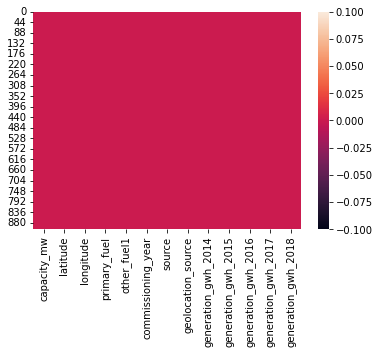

In [1151]:
## Now we have removed the null values from dataset
# let's check it

# Let's visualize the null values clearly
sns.heatmap(df.isnull())

In [1152]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1998.728776,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030
std,590.085456,6.079148,4.815073,13.158621,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,801.123775,711.181225,737.205450,817.977250,751.644375
50%,59.200000,21.281800,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,2003.000000,801.123775,711.181225,737.205450,817.977250,751.644375
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.

The median is bit greater than the mean in the column latitude which means it is skewed to left.

From the difference between the max and 75% percentile we can say that there are huge outliers present in most of the columns, will remove them before model building.

## exploratory data analysis

# checking the outliers

In [1153]:
# seperating numerical data and categoricsl data

numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [1154]:
# dropping capicity_mw as it is target

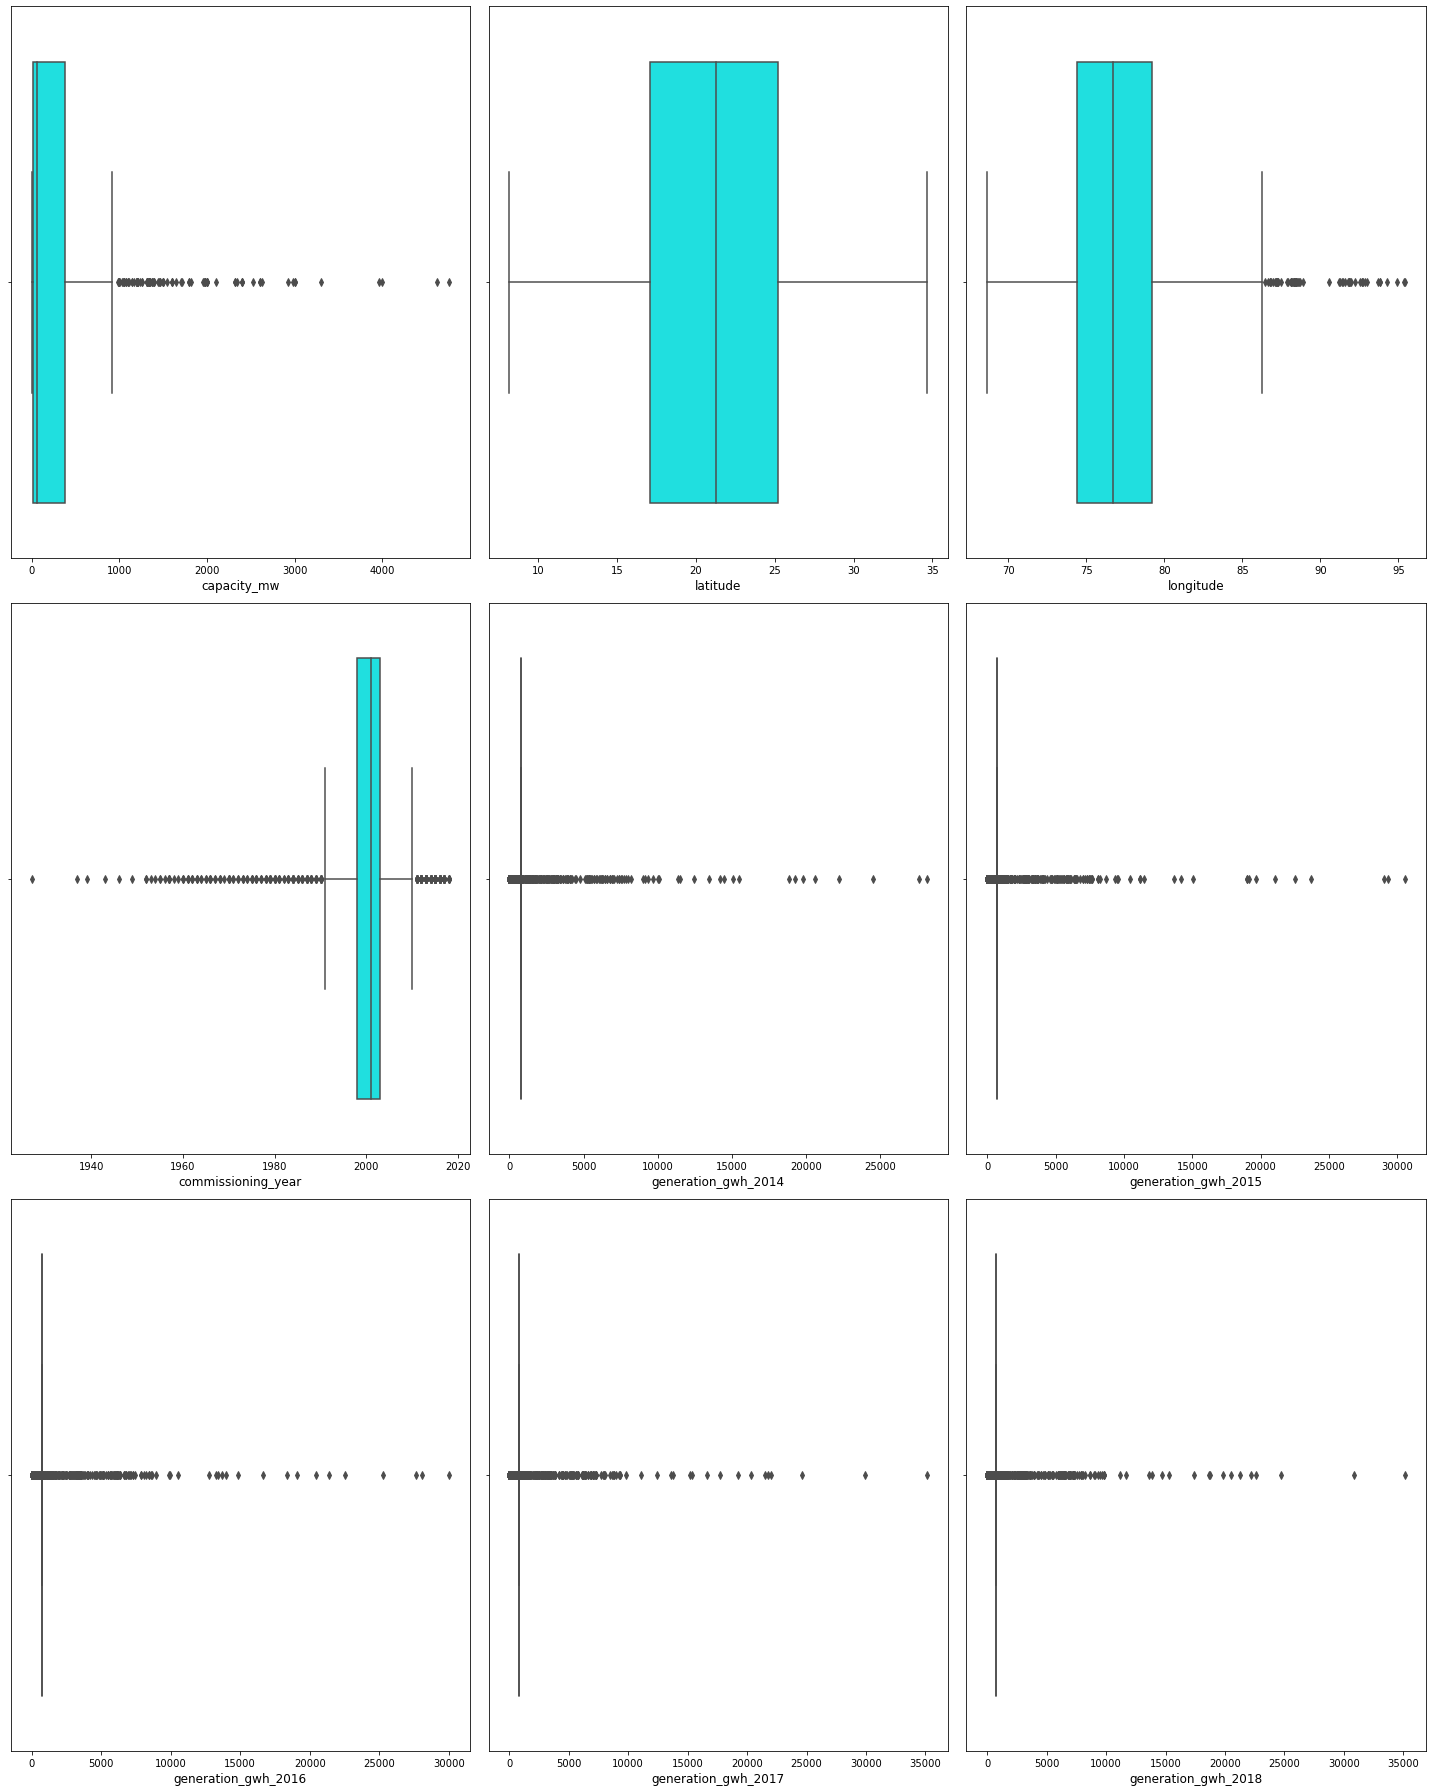

In [1155]:
# box plot

# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize = (20, 25))
plotnumber = 1
for col in numeric_data:
    if plotnumber<=9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(numeric_data[col], color = 'cyan')
        plt.xlabel(col, fontsize = 12)
    plotnumber+=1
plt.tight_layout()

### Every feature has outliers except lattitude,even the target is having a lot of outlier

# Treating Outliers with ZScore


## Removing outliers
### Zscore method

In [1156]:
#dropping capacity_mw as it is target

numeric_data.drop('capacity_mw',axis=1)

,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,28.1839,73.2407,2011.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,24.7663,74.6090,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,21.9038,69.3732,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,23.8712,91.3602,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,21.9603,82.4091,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,2016.0,801.123775,0.994875,233.596650,865.400000,686.500000
903,12.8932,78.1654,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375
904,15.2758,75.5811,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375
905,24.3500,73.7477,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375


In [1157]:
numeric_data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [1158]:
from scipy import stats

# threshold is 3
df_zscore = df[(np.abs(stats.zscore(numeric_data)) < 3).all(axis=1)]

In [1159]:
df_zscore.shape

(846, 13)

In [1160]:
df_zscore.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [1161]:
#Loss percentage
(907-846)/907*100


6.725468577728775

6 percent data will be lost if we use zscore method

## IQR(Inter Qunatile Range) method


In [1162]:
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

df_quantile = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [1163]:
df_quantile.shape

(419, 13)

In [1164]:
#Loss percentage
(907-419)/907*100

53.8037486218302

Using IQR method makes us loss of 53 percentage of data as compare to 6% data loss in case of Zscore method.

So we will use Zscore method

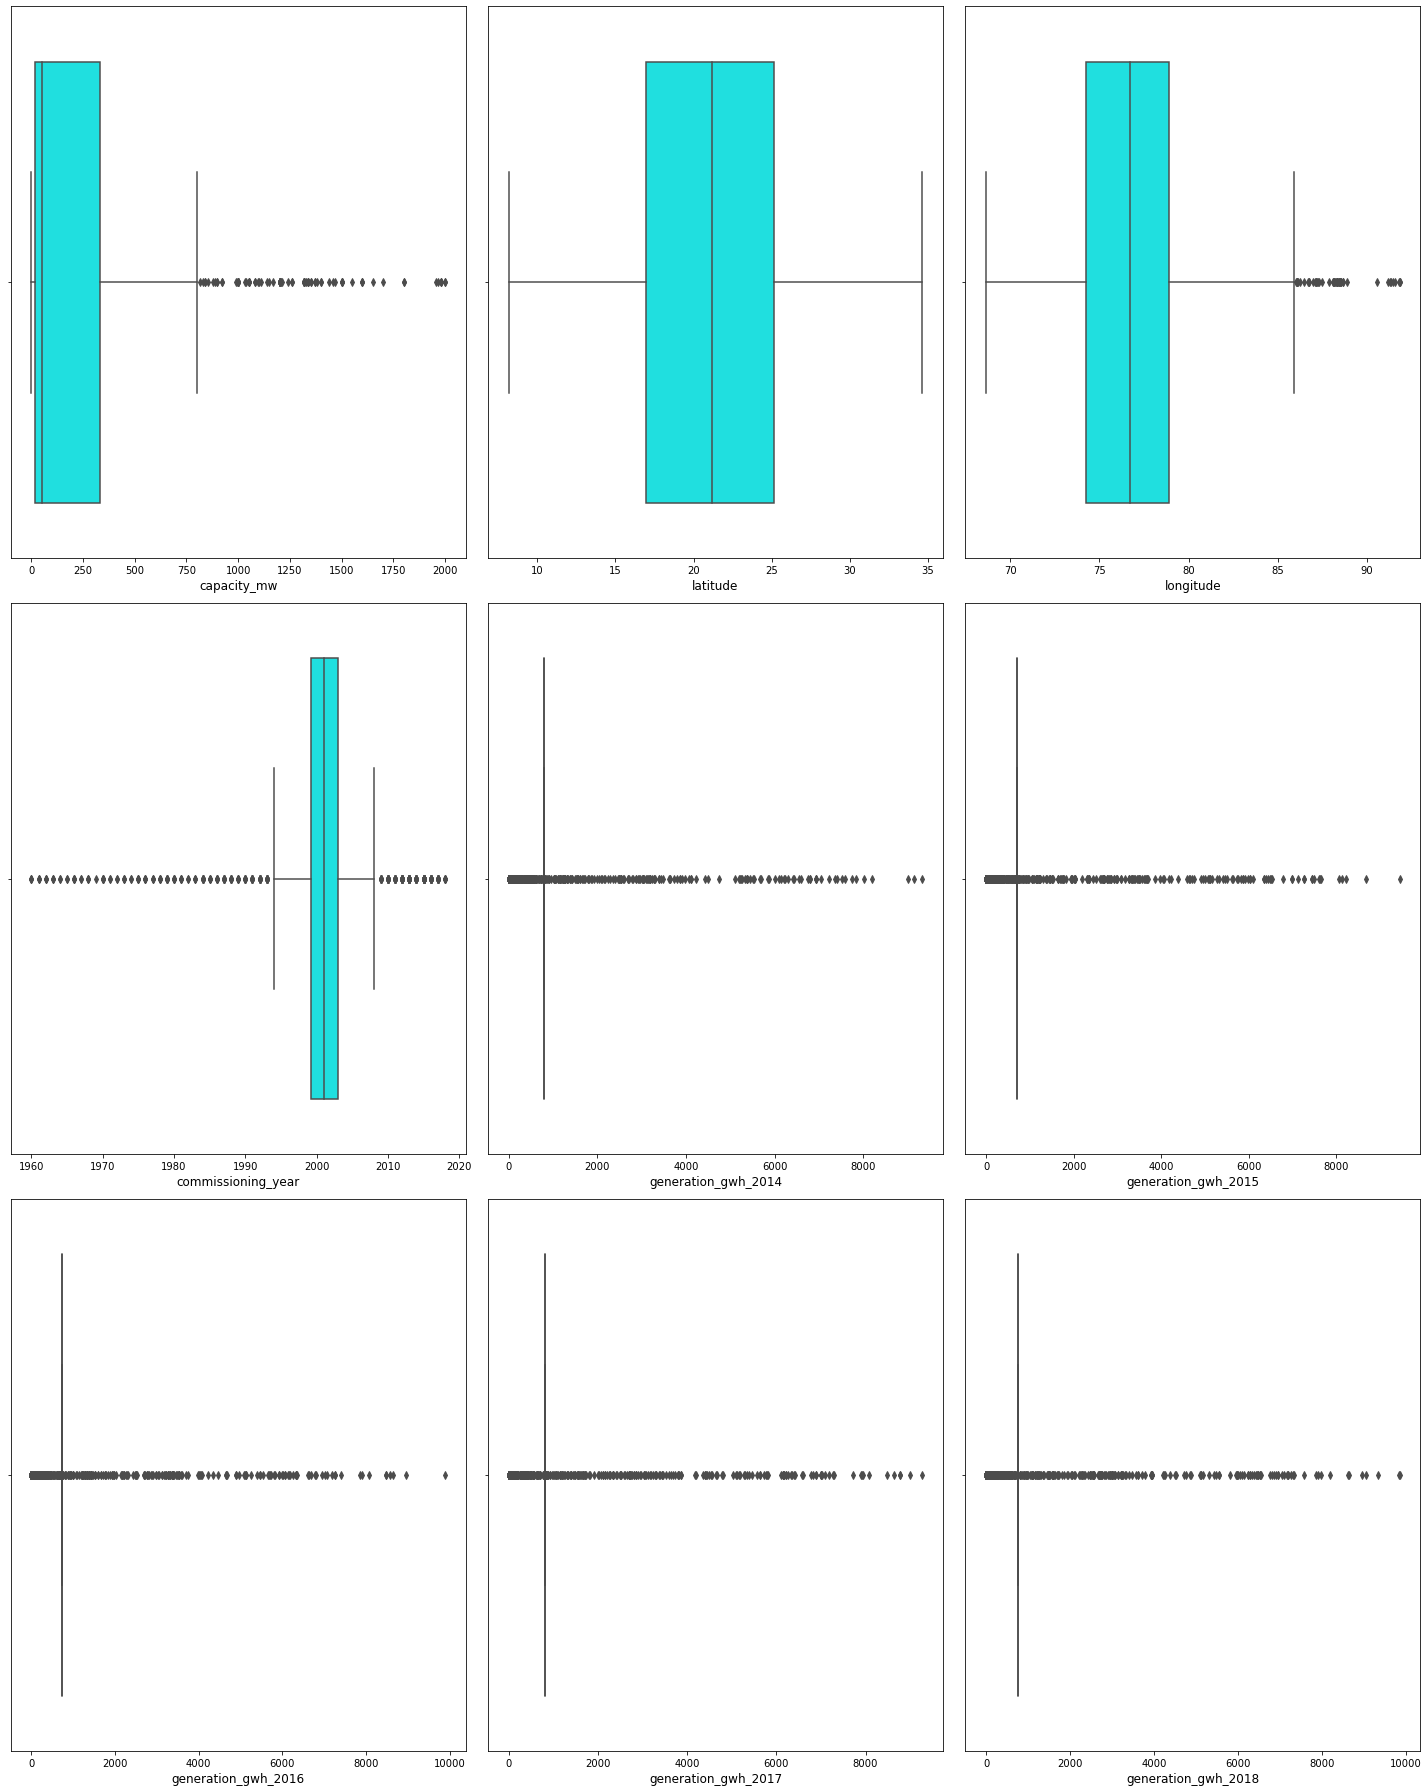

In [1165]:
plt.figure(figsize = (20, 25))
plotnumber = 1
for col in df_zscore.select_dtypes(include=[np.number]):
    if plotnumber<=9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(df_zscore[col], color = 'cyan')
        plt.xlabel(col, fontsize = 12)
    plotnumber+=1
plt.tight_layout()

In [1166]:
df_zscore.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

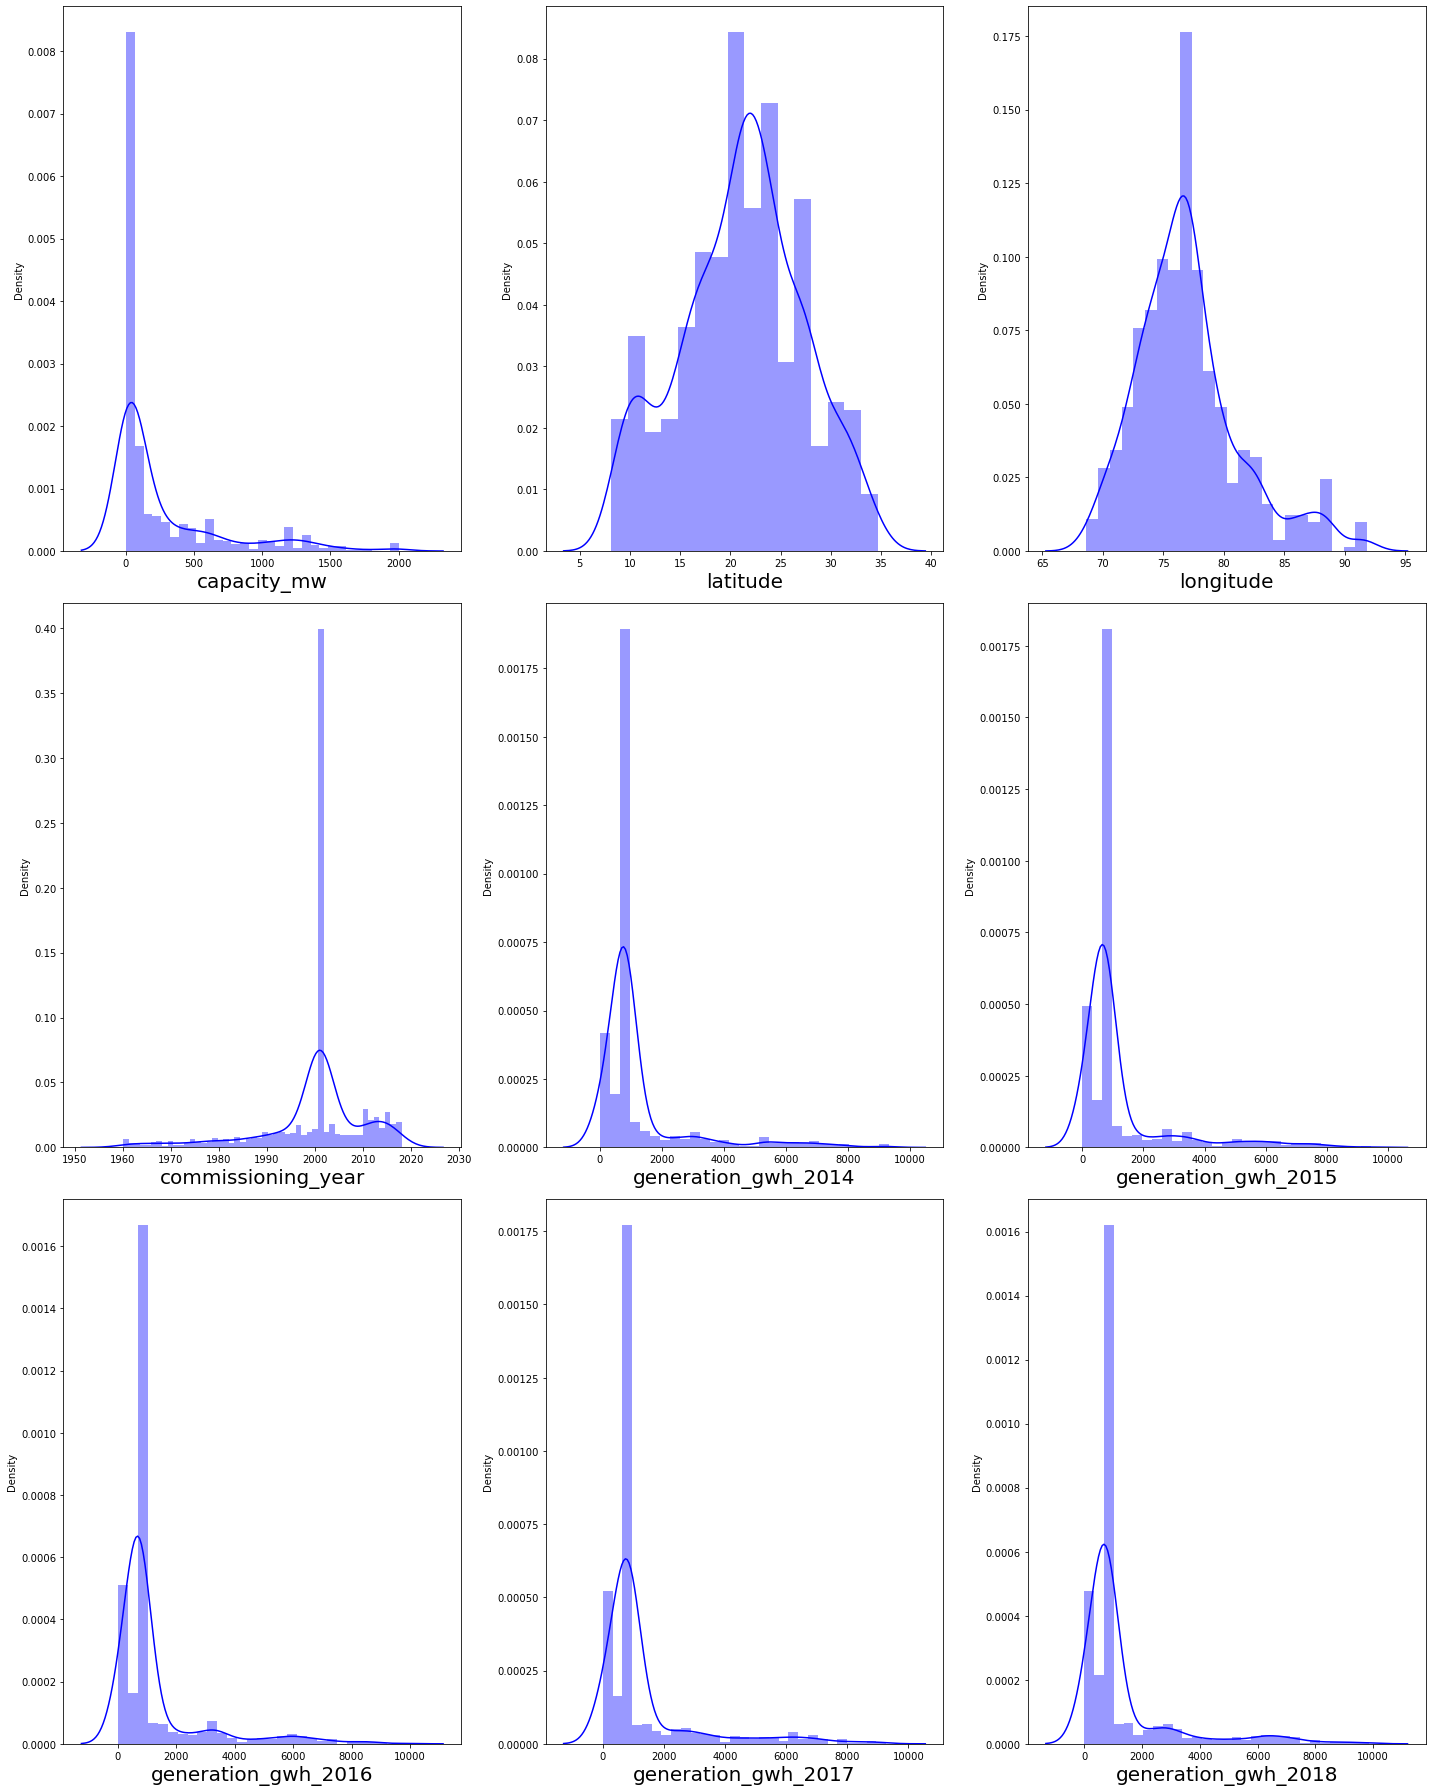

In [1167]:
# Checking how the data has been distributed in each column

plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for col in df_zscore.select_dtypes(include=[np.number]):
    if plotnumber<=9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df_zscore[col], color = 'b')
        plt.xlabel(col, fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [1168]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.163320
commissioning_year    -1.719575
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

In [1169]:
df_zscore.skew()

capacity_mw            1.992633
latitude              -0.118531
longitude              0.948983
commissioning_year    -1.288240
generation_gwh_2014    2.961146
generation_gwh_2015    2.760332
generation_gwh_2016    2.699308
generation_gwh_2017    2.598081
generation_gwh_2018    2.663498
dtype: float64

In [1170]:
df_zscore.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [1171]:
df_zscore.shape

(846, 13)

In [1172]:
# making a copy used in next section problem
pred_fuel_df = df_zscore.copy()

we can see some skewness is reduced

In [1173]:
#df_zscore.corr().sort_values

df_zscore.corr()[['capacity_mw']].sort_values(by='capacity_mw', ascending=False)

,capacity_mw
capacity_mw,1.000000
generation_gwh_2018,0.800151
generation_gwh_2017,0.788933
generation_gwh_2016,0.771628
generation_gwh_2015,0.698624
generation_gwh_2014,0.649177
longitude,0.267535
commissioning_year,0.221471
latitude,0.053430


In [1174]:
# removing the least coorelated data with target which is lattitude also from numeric data
df_zscore = df_zscore.drop('latitude',axis=1) 
numeric_data = numeric_data.drop(['latitude','capacity_mw'],axis=1)

In [1175]:
numeric_data

,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,73.2407,2011.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,74.6090,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,69.3732,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,91.3602,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,82.4091,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...
902,77.3568,2016.0,801.123775,0.994875,233.596650,865.400000,686.500000
903,78.1654,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375
904,75.5811,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375
905,73.7477,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375


In [1176]:
df_zscore

,capacity_mw,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,69.3732,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,91.3602,Gas,Oil,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,78.1654,Solar,Oil,2001.0,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,75.5811,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,73.7477,Coal,Oil,2001.0,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375


# Binary Encoding categorical Data

In [1177]:
categorical_data.columns

Index(['primary_fuel', 'other_fuel1', 'source', 'geolocation_source'], dtype='object')

In [1178]:
categorical_data

,primary_fuel,other_fuel1,source,geolocation_source
0,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,Coal,Oil,Ultratech Cement ltd,WRI
2,Wind,Oil,CDM,WRI
3,Gas,Oil,Central Electricity Authority,WRI
4,Coal,Oil,Central Electricity Authority,WRI
...,...,...,...,...
902,Coal,Oil,Central Electricity Authority,WRI
903,Solar,Oil,Karnataka Power Corporation Limited,Industry About
904,Wind,Oil,CDM,WRI
905,Coal,Oil,Hindustan Zinc ltd,WRI


In [1179]:
from category_encoders import BinaryEncoder

bi_enc = BinaryEncoder()

bi_enc = BinaryEncoder(cols=['primary_fuel', 'other_fuel1','source','geolocation_source']).fit(categorical_data)

cat_enc = bi_enc.transform(categorical_data)

In [1180]:
cat_enc

,primary_fuel_0,primary_fuel_1,primary_fuel_2,primary_fuel_3,other_fuel1_0,other_fuel1_1,source_0,source_1,source_2,source_3,source_4,source_5,source_6,source_7,geolocation_source_0,geolocation_source_1
0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
2,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0
3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
903,0,0,0,1,0,1,0,1,0,0,1,1,1,1,1,1
904,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0
905,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0


since we don't see any values less than 0.

So all are positive

so we will use yeo-jhonson technique

In [1181]:
df_zscore

,capacity_mw,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,69.3732,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,91.3602,Gas,Oil,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,78.1654,Solar,Oil,2001.0,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,75.5811,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,73.7477,Coal,Oil,2001.0,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375


In [1182]:
#y = df[['y']]
#X = df.drop(columns=['y'])

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=True)
new_numeric_data = pt.fit_transform(numeric_data)

In [1183]:
df_xt = pd.DataFrame(data=new_numeric_data, columns=numeric_data.columns)


In [1184]:
df_xt

,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.944854,1.113530,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
1,-0.534212,0.053562,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
2,-2.390933,0.053562,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
3,2.167755,0.346488,-0.243102,0.072704,0.083178,-0.185637,-0.184018
4,1.126913,1.610143,1.152947,1.836146,1.842814,1.621580,1.919439
...,...,...,...,...,...,...,...
902,0.166816,1.741534,-0.046742,-2.579263,-0.782355,0.001238,-0.122761
903,0.346098,0.053562,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
904,-0.268685,0.053562,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
905,-0.787375,0.053562,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174


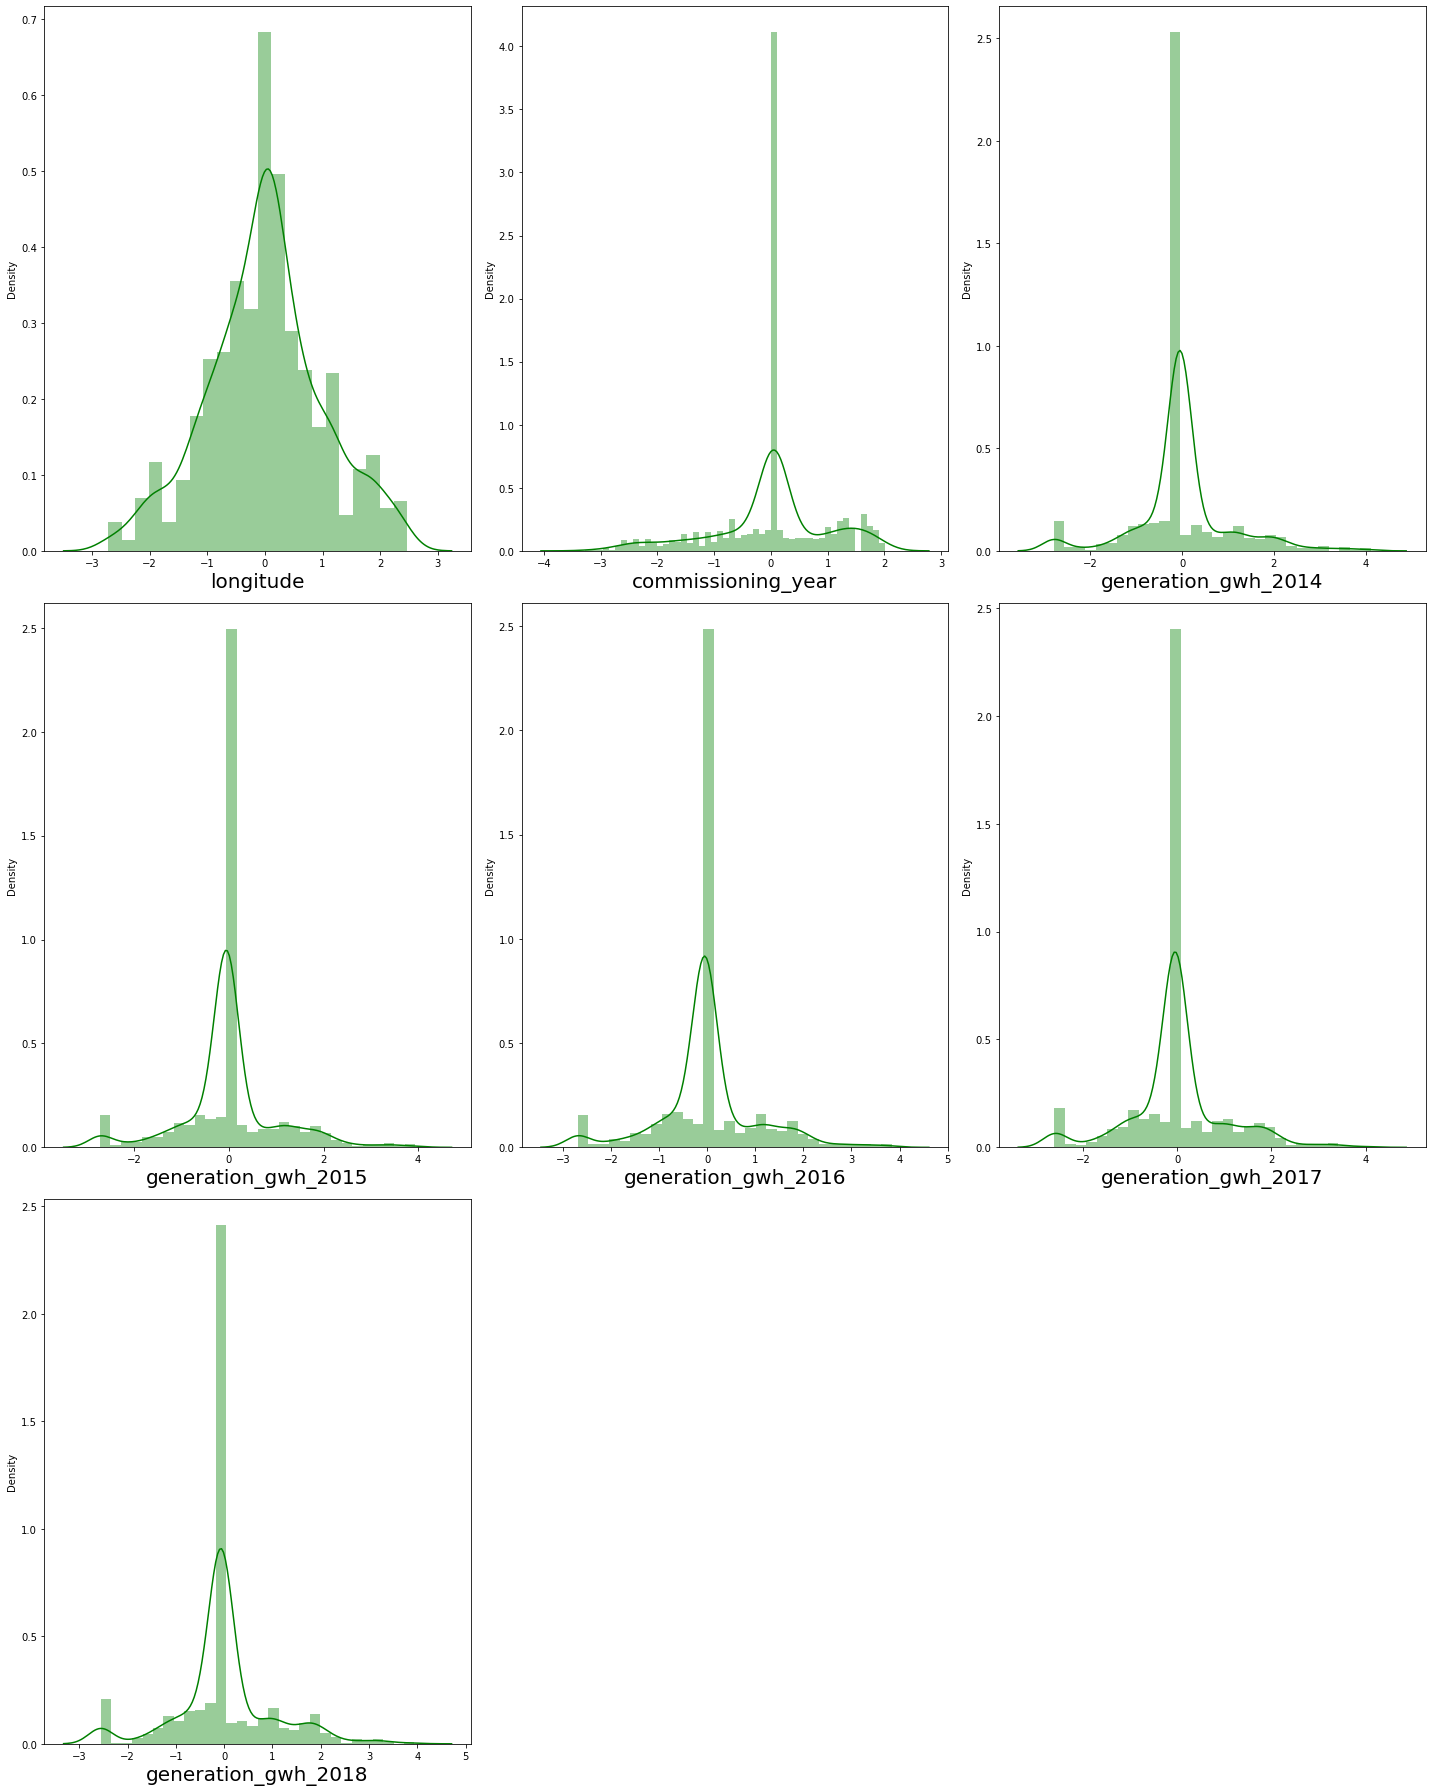

In [1185]:
# Checking how the data has been distributed in each column

plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for col in df_xt:
    if plotnumber<=8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df_xt[col], color = 'g')
        plt.xlabel(col, fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [1186]:
df_xt.skew()

longitude              0.002675
commissioning_year    -0.525056
generation_gwh_2014    0.285906
generation_gwh_2015    0.222151
generation_gwh_2016    0.204011
generation_gwh_2017    0.196816
generation_gwh_2018    0.193103
dtype: float64

Removed the skewness using yeo-johnson method. The skewness has been removed in all the numerical columns.

##  Feature Scaling using Standard Scaler


In [1187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_xt = pd.DataFrame(scaler.fit_transform(df_xt), columns = df_xt.columns)
df_xt

,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.944855,1.113530,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
1,-0.534213,0.053562,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
2,-2.390933,0.053562,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
3,2.167755,0.346488,-0.243102,0.072704,0.083178,-0.185637,-0.184018
4,1.126913,1.610143,1.152947,1.836146,1.842814,1.621580,1.919439
...,...,...,...,...,...,...,...
902,0.166816,1.741534,-0.046742,-2.579263,-0.782355,0.001238,-0.122761
903,0.346098,0.053562,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
904,-0.268686,0.053562,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
905,-0.787375,0.053562,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174


## Checking for MultiColinearity


In [1188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(df_xt.values, i)
              for i in range(len(df_xt.columns))]
vif["Features"] = df_xt.columns
vif

,VIF values,Features
0,1.020804,longitude
1,1.065982,commissioning_year
2,4.079537,generation_gwh_2014
3,6.826933,generation_gwh_2015
4,11.261583,generation_gwh_2016
5,9.905826,generation_gwh_2017
6,9.626289,generation_gwh_2018


In [1189]:
# Dropping the column 'generation_gwh_2016'
df_xt = df_xt.drop('generation_gwh_2016',axis=1) 

In [1190]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(df_xt.values, i)
              for i in range(len(df_xt.columns))]
vif["Features"] = df_xt.columns
vif

,VIF values,Features
0,1.015462,longitude
1,1.042402,commissioning_year
2,4.055435,generation_gwh_2014
3,4.817092,generation_gwh_2015
4,8.817229,generation_gwh_2017
5,9.055137,generation_gwh_2018


Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models.



In [1191]:
df_treated = pd.concat([df_xt, cat_enc], axis=1)

In [1192]:
df_treated

,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018,primary_fuel_0,primary_fuel_1,primary_fuel_2,primary_fuel_3,...,source_0,source_1,source_2,source_3,source_4,source_5,source_6,source_7,geolocation_source_0,geolocation_source_1
0,-0.944855,1.113530,-0.046742,-0.052449,-0.039359,-0.061174,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,-0.534213,0.053562,-0.046742,-0.052449,-0.039359,-0.061174,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,-2.390933,0.053562,-0.046742,-0.052449,-0.039359,-0.061174,0,0,1,1,...,0,0,0,0,0,0,1,1,1,0
3,2.167755,0.346488,-0.243102,0.072704,-0.185637,-0.184018,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1.126913,1.610143,1.152947,1.836146,1.621580,1.919439,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.166816,1.741534,-0.046742,-2.579263,0.001238,-0.122761,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
903,0.346098,0.053562,-0.046742,-0.052449,-0.039359,-0.061174,0,0,0,1,...,0,1,0,0,1,1,1,1,1,1
904,-0.268686,0.053562,-0.046742,-0.052449,-0.039359,-0.061174,0,0,1,1,...,0,0,0,0,0,0,1,1,1,0
905,-0.787375,0.053562,-0.046742,-0.052449,-0.039359,-0.061174,0,0,1,0,...,0,0,1,0,1,0,1,0,1,0


In [1193]:
y = df['capacity_mw']
x = df_treated

## Modelling

##### Creating Traainning and Testing Data

In [1194]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state = 42)

## Regression Algorithms

In [1195]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics

## RandomForestRegressor

In [1196]:
# Checking R2 score for RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
predRFR = RFR.predict(x_test)
print("R2_Score:", r2_score(y_test, predRFR))
print("MAE:", metrics.mean_absolute_error(y_test, predRFR))
print("MSE:", metrics.mean_squared_error(y_test, predRFR))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

R2_Score: 0.8781372086299236
MAE: 107.03603407508548
MSE: 51359.16729048357
RMSE: 226.6256104028924


## DecisionTreeRegressor

In [1197]:
# Checking R2 score for DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
predDTR = DTR.predict(x_test)
print("R2_Score:", r2_score(y_test, predDTR))
print("MAE:", metrics.mean_absolute_error(y_test, predDTR))
print("MSE:", metrics.mean_squared_error(y_test, predDTR))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

R2_Score: 0.8199567603027837
MAE: 131.88627564102563
MSE: 75879.36205275984
RMSE: 275.4620882313206


## KNN Regressor 

In [1198]:
# Checking R2 score for KNN Regressor
knn = KNN()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
print("R2_Score:", r2_score(y_test, predknn))
print("MAE:", metrics.mean_absolute_error(y_test, predknn))
print("MSE:", metrics.mean_squared_error(y_test, predknn))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predknn)))

R2_Score: 0.8242105837168183
MAE: 121.02340366300368
MSE: 74086.5848983115
RMSE: 272.18850985725226


## GB Regressor

In [1199]:
# Checking R2 score for GB Regressor
GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print("R2_Score:", r2_score(y_test, predGB))
print("MAE:", metrics.mean_absolute_error(y_test, predGB))
print("MSE:", metrics.mean_squared_error(y_test, predGB))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predGB)))

R2_Score: 0.8613344302205362
MAE: 117.07349272135252
MSE: 58440.71119383911
RMSE: 241.74513685664726


## AdaBoost Regressor

In [1200]:
# Checking R2 score for AdaBoost Regressor
ADA = AdaBoostRegressor()
ADA.fit(x_train, y_train)
predADA = ADA.predict(x_test)
print("R2_Score:", r2_score(y_test, predADA))
print("MAE:", metrics.mean_absolute_error(y_test, predADA))
print("MSE:", metrics.mean_squared_error(y_test, predADA))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predADA)))

R2_Score: 0.695013333775128
MAE: 323.74157826616226
MSE: 128536.865403334
RMSE: 358.520383525587


## BaggingRegressor

In [1201]:
# Checking R2 score for BaggingRegressor
BR = BaggingRegressor()
BR.fit(x_train ,y_train)
predBR = BR.predict(x_test)
print("R2_Score:", r2_score(y_test, predBR))
print("MAE:", metrics.mean_absolute_error(y_test, predBR))
print("MSE:", metrics.mean_squared_error(y_test, predBR))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predBR)))

R2_Score: 0.8795798857368402
MAE: 108.3857748896606
MSE: 50751.149912518995
RMSE: 225.28015871913576


## Checking the cross validation score

In [1202]:
from sklearn.model_selection import cross_val_score

In [1203]:
# Checking cv score for RandomForestRegressor
print(cross_val_score(RFR, x, y, cv = 5).mean())

0.8492282238483817


In [1204]:
# Checking cv score for DecisionTreeRegressor
print(cross_val_score(DTR, x, y, cv = 5).mean())

0.7573919521815682


In [1205]:
# Checking cv score for KNN Regressor
print(cross_val_score(knn, x, y, cv = 5).mean())

0.8078088898863973


In [1206]:
# Checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB, x, y, cv = 5).mean())

0.844331196949158


In [1207]:
# Checking cv score for AdaBoost Regressor
print(cross_val_score(ADA, x, y, cv = 5).mean())

0.6719662811391114


In [1208]:
# Checking cv score for Bagging Regressor
print(cross_val_score(BR, x, y, cv = 5).mean())

0.8450988966421921


From the above observation, the difference between R2score and the cross validation score we conclude that KNN as our best fitting model. Lets increase the accuracy of the model by using hyper parameter tuning.

## Hyper parameter tuning


In [1209]:
from sklearn.model_selection import GridSearchCV


In [1210]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [1211]:
GCV = GridSearchCV(KNN(), grid_params, cv = 5)


GCV.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [1212]:
GCV.best_params_


{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

In [1213]:
capacity = KNN(metric='manhattan', n_neighbors=9,weights='distance')
capacity.fit(x_train, y_train)
pred = capacity.predict(x_test)
print("RMSE value:", np.sqrt(metrics.mean_squared_error(y_test, predRFR)))
print('R2_Score:', r2_score(y_test, pred)*100)

RMSE value: 226.6256104028924
R2_Score: 83.66441995942861


After tuning the model, the R2 score is increased by 1.24% and we are getting R2 score as 87.96% for KNNRegressor which is good.



## Saving the model


In [1214]:
import joblib
joblib.dump(capacity,"Global_Power_Plant_capacity_mw.pkl")


['Global_Power_Plant_capacity_mw.pkl']

In [1215]:
capacity = joblib.load("Global_Power_Plant_capacity_mw.pkl")

In [1216]:
import numpy as np
a = np.array(y_test)
predicted = np.array(capacity.predict(x_test))
df_new = pd.DataFrame({"Original":a, "Predicted":predicted}, index = range(len(a)))
df_new

,Original,Predicted
0,187.2,208.154045
1,50.4,39.091882
2,41.4,45.232205
3,770.0,198.289645
4,4.5,9.556495
...,...,...
268,246.0,206.012112
269,5.8,9.579802
270,20.0,21.540189
271,1000.0,1158.647184


## 2. Prediction for primary_fuel

In [1217]:
numeric_data

,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,73.2407,2011.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,74.6090,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,69.3732,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,91.3602,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,82.4091,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...
902,77.3568,2016.0,801.123775,0.994875,233.596650,865.400000,686.500000
903,78.1654,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375
904,75.5811,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375
905,73.7477,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375


### Separating features and labels


In [1218]:
x_df = pred_fuel_df.drop("primary_fuel", axis = 1)
y_df = pred_fuel_df["primary_fuel"]

In [1219]:
x_df

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Oil,2001.0,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Oil,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Oil,2016.0,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Oil,2001.0,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,Oil,2001.0,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375


In [1220]:
y_df

0      Solar
1       Coal
2       Wind
3        Gas
4       Coal
       ...  
902     Coal
903    Solar
904     Wind
905     Coal
906     Wind
Name: primary_fuel, Length: 846, dtype: object

In [1221]:
x_df.shape

(846, 12)

In [1222]:
y_df.shape


(846,)

In [1223]:
# seperating numerical data and categoricsl data

numeric_data_fuel = x_df.select_dtypes(include=[np.number])
categorical_data_fuel = x_df.select_dtypes(exclude=[np.number])

## Checking for Skewness


In [1224]:
x_df.skew()

capacity_mw            1.992633
latitude              -0.118531
longitude              0.948983
commissioning_year    -1.288240
generation_gwh_2014    2.961146
generation_gwh_2015    2.760332
generation_gwh_2016    2.699308
generation_gwh_2017    2.598081
generation_gwh_2018    2.663498
dtype: float64

In [1225]:
numeric_data_fuel

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.0,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,2001.0,801.123775,711.181225,737.205450,817.977250,751.644375


In [1226]:
a = numeric_data_fuel.copy()

In [1227]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=True)
a = pt.fit_transform(a)

In [1228]:
df_fuel = pd.DataFrame(data=a, columns=numeric_data_fuel.columns)


In [1229]:
df_fuel.skew()

capacity_mw            0.015186
latitude              -0.070397
longitude              0.000318
commissioning_year    -0.323194
generation_gwh_2014    0.234988
generation_gwh_2015    0.168580
generation_gwh_2016    0.154255
generation_gwh_2017    0.131308
generation_gwh_2018    0.137478
dtype: float64

### skewness has been removed

## feature scaling

In [1230]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_fuel = pd.DataFrame(scaler.fit_transform(df_fuel), columns = df_fuel.columns)
df_fuel

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.676116,1.168400,-0.918187,1.156948,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
1,0.231634,0.595884,-0.496301,0.002126,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
2,-0.266730,0.120751,-2.373965,0.002126,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
3,0.404484,0.446858,2.426620,0.321256,-0.263441,0.101715,0.111906,-0.191976,-0.186610
4,1.759489,0.130087,1.262373,1.698032,1.432304,2.302682,2.301691,2.020971,2.412487
...,...,...,...,...,...,...,...,...,...
841,1.699689,-0.796664,0.234562,1.841190,-0.038481,-2.461769,-0.842413,0.020775,-0.117460
842,-1.596709,-1.342499,0.423902,0.002126,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
843,-0.501102,-0.961125,-0.221150,0.002126,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495
844,0.121668,0.526524,-0.756895,0.002126,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495


In [1231]:

from category_encoders import BinaryEncoder

bi_enc = BinaryEncoder()

bi_enc = BinaryEncoder(cols=['other_fuel1','source','geolocation_source']).fit(categorical_data_fuel)

cat_enc_fuel = bi_enc.transform(categorical_data_fuel)

In [1232]:
cat_enc_fuel

,other_fuel1_0,other_fuel1_1,source_0,source_1,source_2,source_3,source_4,source_5,source_6,source_7,geolocation_source_0,geolocation_source_1
0,0,1,0,0,0,0,0,0,0,1,0,1
1,0,1,0,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,0,1,1,1,0
3,0,1,0,0,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,1,0,0,0,0,0,1,0,0,1,0
903,0,1,0,1,0,0,1,1,1,1,1,1
904,0,1,0,0,0,0,0,0,1,1,1,0
905,0,1,0,0,1,0,1,0,1,0,1,0


In [1233]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(df_fuel.values, i)
              for i in range(len(df_fuel.columns))]
vif["Features"] = df_fuel.columns
vif

,VIF values,Features
0,1.330142,capacity_mw
1,1.032701,latitude
2,1.165845,longitude
3,1.123301,commissioning_year
4,3.613818,generation_gwh_2014
5,6.266471,generation_gwh_2015
6,10.928461,generation_gwh_2016
7,9.698849,generation_gwh_2017
8,9.215523,generation_gwh_2018


In [1234]:
# dropping generation_gwh_2016 as it has vif more than 10

df_fuel = df_fuel.drop("generation_gwh_2016",axis=1)
df_fuel

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018
0,-1.676116,1.168400,-0.918187,1.156948,-0.038481,-0.041708,-0.025789,-0.047495
1,0.231634,0.595884,-0.496301,0.002126,-0.038481,-0.041708,-0.025789,-0.047495
2,-0.266730,0.120751,-2.373965,0.002126,-0.038481,-0.041708,-0.025789,-0.047495
3,0.404484,0.446858,2.426620,0.321256,-0.263441,0.101715,-0.191976,-0.186610
4,1.759489,0.130087,1.262373,1.698032,1.432304,2.302682,2.020971,2.412487
...,...,...,...,...,...,...,...,...
841,1.699689,-0.796664,0.234562,1.841190,-0.038481,-2.461769,0.020775,-0.117460
842,-1.596709,-1.342499,0.423902,0.002126,-0.038481,-0.041708,-0.025789,-0.047495
843,-0.501102,-0.961125,-0.221150,0.002126,-0.038481,-0.041708,-0.025789,-0.047495
844,0.121668,0.526524,-0.756895,0.002126,-0.038481,-0.041708,-0.025789,-0.047495


In [1235]:
df_fuel.shape

(846, 8)

In [1236]:
cat_enc_fuel.shape

(846, 12)

In [1237]:
df_fuel.reset_index()
cat_enc_fuel.reset_index()

,index,other_fuel1_0,other_fuel1_1,source_0,source_1,source_2,source_3,source_4,source_5,source_6,source_7,geolocation_source_0,geolocation_source_1
0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,1,0,1,0,0,0,0,0,0,1,0,1,0
2,2,0,1,0,0,0,0,0,0,1,1,1,0
3,3,0,1,0,0,0,0,0,1,0,0,1,0
4,4,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,902,0,1,0,0,0,0,0,1,0,0,1,0
842,903,0,1,0,1,0,0,1,1,1,1,1,1
843,904,0,1,0,0,0,0,0,0,1,1,1,0
844,905,0,1,0,0,1,0,1,0,1,0,1,0


In [1238]:
# concatenate the features
df_fuel_x = pd.concat([df_fuel.reset_index(drop=True), cat_enc_fuel.reset_index(drop=True)], axis=1)


In [1239]:
df_fuel_x.shape

(846, 20)

In [1240]:
df_fuel_y =  y_df.copy()

In [1241]:
df_fuel_y.value_counts()

Coal       233
Hydro      220
Solar      126
Wind       123
Gas         65
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

Here we can observe that the target variabe primary_fuel has multiclasses which means it is a multiclassification problem.
## We can see the dataset is imbalanced


In [1242]:
# oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
df_fuel_x, df_fuel_y = SM.fit_resample(df_fuel_x, df_fuel_y)

In [1243]:
df_fuel_y.value_counts()

Solar      233
Coal       233
Wind       233
Gas        233
Hydro      233
Biomass    233
Oil        233
Nuclear    233
Name: primary_fuel, dtype: int64

In [1244]:
df_fuel_y

0       Solar
1        Coal
2        Wind
3         Gas
4        Coal
        ...  
1859     Wind
1860     Wind
1861     Wind
1862     Wind
1863     Wind
Name: primary_fuel, Length: 1864, dtype: object

In [1245]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_fuel_y= label_encoder.fit_transform(df_fuel_y)
  
df_fuel_y

array([6, 1, 7, ..., 7, 7, 7])

In [1246]:
# data after preprocessing and cleaning
df_fuel_x

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018,other_fuel1_0,other_fuel1_1,source_0,source_1,source_2,source_3,source_4,source_5,source_6,source_7,geolocation_source_0,geolocation_source_1
0,-1.676116,1.168400,-0.918187,1.156948,-0.038481,-0.041708,-0.025789,-0.047495,0,1,0,0,0,0,0,0,0,1,0,1
1,0.231634,0.595884,-0.496301,0.002126,-0.038481,-0.041708,-0.025789,-0.047495,0,1,0,0,0,0,0,0,1,0,1,0
2,-0.266730,0.120751,-2.373965,0.002126,-0.038481,-0.041708,-0.025789,-0.047495,0,1,0,0,0,0,0,0,1,1,1,0
3,0.404484,0.446858,2.426620,0.321256,-0.263441,0.101715,-0.191976,-0.186610,0,1,0,0,0,0,0,1,0,0,1,0
4,1.759489,0.130087,1.262373,1.698032,1.432304,2.302682,2.020971,2.412487,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,-0.326171,0.004255,0.077573,0.002126,-0.038481,-0.041708,-0.025789,-0.047495,0,1,0,0,0,0,0,0,1,1,1,0
1860,-1.243018,0.004255,0.077573,0.002126,-0.038481,-0.041708,-0.025789,-0.047495,0,1,0,0,0,0,0,0,1,1,1,0
1861,-0.506817,0.926584,-1.750318,0.002126,-0.038481,-0.041708,-0.025789,-0.047495,0,1,0,0,0,0,0,0,1,1,1,0
1862,-0.165535,0.977154,-1.765095,0.002126,-0.038481,-0.041708,-0.025789,-0.047495,0,1,0,0,0,0,0,0,1,1,1,0


## Modelling


## Creating train_test_split


In [1247]:
x_fuel_df_train, x_fuel_df_test, y_fuel_df_train, y_fuel_df_test = train_test_split(df_fuel_x, df_fuel_y, test_size = 0.30, random_state = 42)


## Classification Algorithms


In [1248]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

## DecisionTreeClassifier

In [1249]:
y_fuel_df_train

array([2, 4, 5, ..., 0, 5, 2])

In [1250]:
# Checking Accuracy for DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_fuel_df_train, y_fuel_df_train)
predDTC = DTC.predict(x_fuel_df_test)
print('Confusion Matrix')
print(confusion_matrix(y_fuel_df_test, predDTC))
print(accuracy_score(y_fuel_df_test, predDTC))
print(classification_report(y_fuel_df_test, predDTC))

Confusion Matrix
[[63  1  0  0  0  2  0  1]
 [ 5 38 10  7  7  3  0  0]
 [ 1  4 50  6  0  3  0  0]
 [ 0  5  8 49  0  3  0  0]
 [ 0  3  0  0 79  0  0  0]
 [ 0  0  4  0  0 70  0  0]
 [ 0  0  2  1  0  0 71  0]
 [ 0  0  0  0  0  0  0 64]]
0.8642857142857143
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        67
           1       0.75      0.54      0.63        70
           2       0.68      0.78      0.72        64
           3       0.78      0.75      0.77        65
           4       0.92      0.96      0.94        82
           5       0.86      0.95      0.90        74
           6       1.00      0.96      0.98        74
           7       0.98      1.00      0.99        64

    accuracy                           0.86       560
   macro avg       0.86      0.86      0.86       560
weighted avg       0.86      0.86      0.86       560



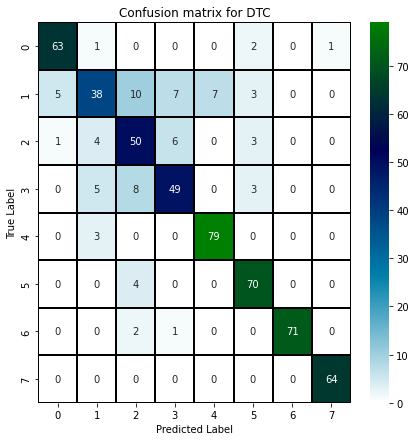

In [1251]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_fuel_df_test, predDTC)
#x_axis_labels = ["0", "1", "2", "3", "4", "5", "6", "7"]
#y_axis_labels = ["0", "1", "2", "3", "4", "5", "6", "7"]
f , ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, cmap = "ocean_r")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for DTC")
plt.show()

In [1252]:
# Checking Accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_fuel_df_train, y_fuel_df_train)
predRFC = RFC.predict(x_fuel_df_test)
print(accuracy_score(y_fuel_df_test, predRFC))
print(confusion_matrix(y_fuel_df_test, predRFC))
print(classification_report(y_fuel_df_test, predRFC))

0.9125
[[67  0  0  0  0  0  0  0]
 [ 9 42  7  7  5  0  0  0]
 [ 1  2 60  0  0  1  0  0]
 [ 0  6  5 53  1  0  0  0]
 [ 0  1  1  0 80  0  0  0]
 [ 0  0  1  2  0 71  0  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        67
           1       0.82      0.60      0.69        70
           2       0.81      0.94      0.87        64
           3       0.85      0.82      0.83        65
           4       0.93      0.98      0.95        82
           5       0.99      0.96      0.97        74
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        64

    accuracy                           0.91       560
   macro avg       0.91      0.91      0.91       560
weighted avg       0.91      0.91      0.91       560



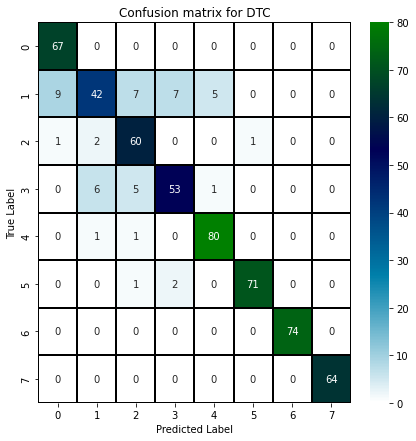

In [1253]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_fuel_df_test, predRFC)
f , ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, cmap = "ocean_r")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for DTC")
plt.show()

In [1254]:
# Checking Accuracy for SVC
svc = SVC()
svc.fit(x_fuel_df_train, y_fuel_df_train)
predsvc = svc.predict(x_fuel_df_test)
print(accuracy_score(y_fuel_df_test, predsvc))
print(confusion_matrix(y_fuel_df_test, predsvc))
print(classification_report(y_fuel_df_test, predsvc))

0.8660714285714286
[[65  0  1  0  0  0  0  1]
 [ 9 38 11  6  5  1  0  0]
 [ 1  2 50  1  1  9  0  0]
 [ 0  5  9 48  3  0  0  0]
 [ 0  0  0  0 82  0  0  0]
 [ 1  0  0  3  0 68  0  2]
 [ 0  4  0  0  0  0 70  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        67
           1       0.78      0.54      0.64        70
           2       0.70      0.78      0.74        64
           3       0.83      0.74      0.78        65
           4       0.90      1.00      0.95        82
           5       0.87      0.92      0.89        74
           6       1.00      0.95      0.97        74
           7       0.96      1.00      0.98        64

    accuracy                           0.87       560
   macro avg       0.86      0.86      0.86       560
weighted avg       0.86      0.87      0.86       560



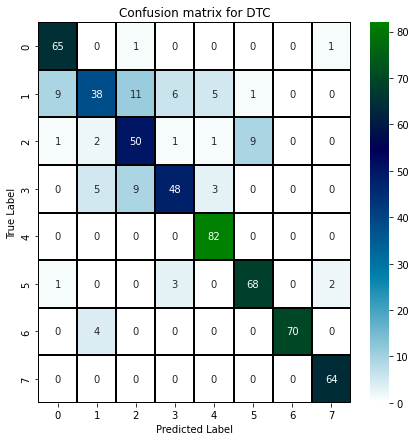

In [1255]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_fuel_df_test, predsvc)
f , ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, cmap = "ocean_r")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for DTC")
plt.show()

In [1256]:
# Checking Accuracy for KNeighborsClassifier
knn = KNC()
knn.fit(x_fuel_df_train, y_fuel_df_train)
predknn = knn.predict(x_fuel_df_test)
print(accuracy_score(y_fuel_df_test, predknn))
print(confusion_matrix(y_fuel_df_test, predknn))
print(classification_report(y_fuel_df_test, predknn))

0.8571428571428571
[[66  0  1  0  0  0  0  0]
 [10 33 13  6  7  0  0  1]
 [ 1  5 51  1  0  6  0  0]
 [ 0  3 11 46  3  2  0  0]
 [ 0  0  0  0 82  0  0  0]
 [ 1  0  1  0  0 70  0  2]
 [ 3  0  2  0  0  0 68  1]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89        67
           1       0.80      0.47      0.59        70
           2       0.65      0.80      0.71        64
           3       0.87      0.71      0.78        65
           4       0.89      1.00      0.94        82
           5       0.90      0.95      0.92        74
           6       1.00      0.92      0.96        74
           7       0.94      1.00      0.97        64

    accuracy                           0.86       560
   macro avg       0.86      0.85      0.85       560
weighted avg       0.86      0.86      0.85       560



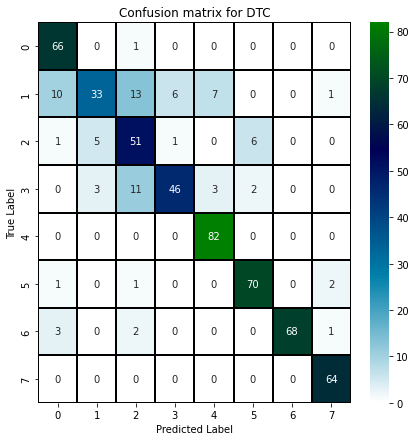

In [1257]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_fuel_df_test, predknn)
f , ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, cmap = "ocean_r")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for DTC")
plt.show()

In [1258]:
# Checking Accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_fuel_df_train, y_fuel_df_train)
predGB = GB.predict(x_fuel_df_test)
print(accuracy_score(y_fuel_df_test, predGB))
print(confusion_matrix(y_fuel_df_test, predGB))
print(classification_report(y_fuel_df_test, predGB))

0.9071428571428571
[[66  0  1  0  0  0  0  0]
 [ 6 41  6 10  7  0  0  0]
 [ 1  0 57  1  0  5  0  0]
 [ 0  5  5 53  2  0  0  0]
 [ 0  0  1  0 81  0  0  0]
 [ 0  0  1  1  0 72  0  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.89      0.59      0.71        70
           2       0.80      0.89      0.84        64
           3       0.82      0.82      0.82        65
           4       0.90      0.99      0.94        82
           5       0.94      0.97      0.95        74
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        64

    accuracy                           0.91       560
   macro avg       0.91      0.90      0.90       560
weighted avg       0.91      0.91      0.90       560



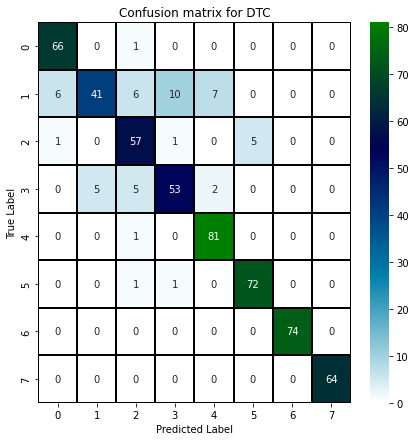

In [1259]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_fuel_df_test, predGB)
f , ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, cmap = "ocean_r")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for DTC")
plt.show()

In [1260]:
# Checking Accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_fuel_df_train, y_fuel_df_train)
predBC = BC.predict(x_fuel_df_test)
print(accuracy_score(y_fuel_df_test, predBC))
print(confusion_matrix(y_fuel_df_test, predBC))
print(classification_report(y_fuel_df_test, predBC))

0.8982142857142857
[[66  0  0  0  0  0  0  1]
 [ 6 39  9  9  6  1  0  0]
 [ 1  0 61  1  0  1  0  0]
 [ 0  6  7 50  1  1  0  0]
 [ 0  1  0  0 81  0  0  0]
 [ 0  0  2  2  0 70  0  0]
 [ 0  0  0  1  0  1 72  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.85      0.56      0.67        70
           2       0.77      0.95      0.85        64
           3       0.79      0.77      0.78        65
           4       0.92      0.99      0.95        82
           5       0.95      0.95      0.95        74
           6       1.00      0.97      0.99        74
           7       0.98      1.00      0.99        64

    accuracy                           0.90       560
   macro avg       0.90      0.90      0.89       560
weighted avg       0.90      0.90      0.89       560



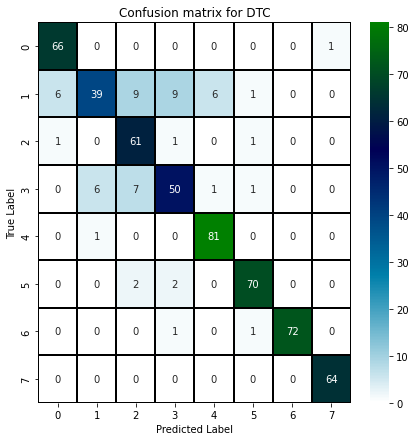

In [1261]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_fuel_df_test, predBC)
f , ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, cmap = "ocean_r")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for DTC")
plt.show()

## Checking the cross Validation Score


In [1262]:
from sklearn.model_selection import cross_val_score

In [1263]:
# CV score for DecisionTreeClassifier
print(cross_val_score(DTC, df_fuel_x, df_fuel_y, cv = 5).mean())

0.8959252212516937


In [1264]:
# CV score for RandomForestClassifier
print(cross_val_score(RFC, df_fuel_x, df_fuel_y, cv = 5).mean())

0.9313283749891896


In [1265]:
# CV score for SVC
print(cross_val_score(svc, df_fuel_x, df_fuel_y, cv = 5).mean())

0.8776773616996743


In [1266]:
# CV score for KNNClassifier
print(cross_val_score(knn, df_fuel_x, df_fuel_y, cv = 5).mean())

0.8771368445328489


In [1267]:
# CV score for GradientBoostingClassifier
print(cross_val_score(GB, df_fuel_x, df_fuel_y, cv = 5).mean())


0.9093329297471822


In [1268]:
# CV score for BaggingClassifier
print(cross_val_score(BC, df_fuel_x, df_fuel_y, cv = 5).mean())

0.9141644325290438


Since the differnce between accuracy score and cross validation score is small in SVC.So we will use SVC


## Hyperparameter tuning


In [1269]:
from sklearn.model_selection import GridSearchCV

In [1270]:
# Support Vector Machine Classifier 
param_grid = {'C': [0.1, 1, 10, 100, 1000],   
              'kernel': ['rbf', 'poly', 'linear']}

In [1271]:
grid = GridSearchCV(svc, param_grid, refit = True, scoring='accuracy') 


In [1272]:
grid.fit(x_fuel_df_train, y_fuel_df_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring='accuracy')

In [1273]:
best_para = grid.best_params_
print(best_para)
best_res = grid.best_score_
print(best_res)

{'C': 100, 'kernel': 'rbf'}
0.9202357795461242


In [1274]:
svc_obj = SVC(C=100, kernel = 'rbf')
svc_obj.fit(x_fuel_df_train, y_fuel_df_train)
pred = svc_obj.predict(x_fuel_df_test)


In [1275]:
print('accuracy_score', accuracy_score(y_fuel_df_test, pred))
print('confusion_matrix', confusion_matrix(y_fuel_df_test, pred))
print('classification_report', classification_report(y_fuel_df_test, pred))

accuracy_score 0.9285714285714286
confusion_matrix [[65  2  0  0  0  0  0  0]
 [ 7 46  6  8  3  0  0  0]
 [ 0  0 64  0  0  0  0  0]
 [ 0  5  7 53  0  0  0  0]
 [ 0  1  0  0 81  0  0  0]
 [ 0  0  1  0  0 73  0  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 64]]
classification_report               precision    recall  f1-score   support

           0       0.90      0.97      0.94        67
           1       0.85      0.66      0.74        70
           2       0.82      1.00      0.90        64
           3       0.87      0.82      0.84        65
           4       0.96      0.99      0.98        82
           5       1.00      0.99      0.99        74
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        64

    accuracy                           0.93       560
   macro avg       0.93      0.93      0.92       560
weighted avg       0.93      0.93      0.93       560



The accuracy of the best model is increased by 15% after tuning and giving 92.21% accuracy which is good.



In [1276]:
# Saving the model using .pkl
import joblib
joblib.dump(svc_obj,"Global_Power_Plant_Fuel_Type.pkl")

['Global_Power_Plant_Fuel_Type.pkl']

Conclusion
The final R2 score for the prediction of capacity_mw of the power plant using Regression algorithms is = 87.96%.

The final accuracy for the prediction of Fuel_Type of the power plant using Classification algorithms is = 93.21%.

In [1277]:
model = joblib.load('Global_Power_Plant_Fuel_Type.pkl')

In [1278]:
import numpy as np
a = np.array(y_fuel_df_test)
predicted = np.array(model.predict(x_fuel_df_test))
df_new = pd.DataFrame({"Original":a, "Predicted":predicted}, index= range(len(a)))
df_new

,Original,Predicted
0,6,6
1,1,1
2,4,4
3,6,6
4,6,6
...,...,...
555,2,2
556,6,6
557,2,2
558,6,6
